🟢 1️⃣ Title & Objective 

# Car Selling Price Prediction

## Objective
Build a regression model to predict car selling price based on car features

🟢 2️⃣ Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle


🟢 3️⃣ Load Dataset

In [ ]:
df = pd.read_csv("reg_cars_selling.csv")
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


🔹  Explore Data 

In [54]:
df.shape


(8128, 11)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [28]:
df.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


🔹  Data Cleaning

In [55]:
df.columns
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [56]:
df.dropna(inplace=True)


🔹 5 Feature Selection



In [57]:
features = [
    'year',
    'km_driven',
    'fuel',
    'seller_type',
    'transmission',
    'owner',
    'seats'
]

target = 'selling_price'

df = df[features + [target]]
df.head()


,year,km_driven,fuel,seller_type,transmission,owner,seats,selling_price
0,2014,145500,Diesel,Individual,Manual,First Owner,5.0,450000
1,2014,120000,Diesel,Individual,Manual,Second Owner,5.0,370000
2,2006,140000,Petrol,Individual,Manual,Third Owner,5.0,158000
3,2010,127000,Diesel,Individual,Manual,First Owner,5.0,225000
4,2007,120000,Petrol,Individual,Manual,First Owner,5.0,130000


🔹  Encoding 

In [58]:
df_encoded = pd.get_dummies(
    df,
    columns=['fuel', 'seller_type', 'transmission', 'owner'],
    drop_first=True
)

df_encoded.head()


,year,km_driven,seats,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,5.0,450000,True,False,False,True,False,True,False,False,False,False
1,2014,120000,5.0,370000,True,False,False,True,False,True,False,True,False,False
2,2006,140000,5.0,158000,False,False,True,True,False,True,False,False,False,True
3,2010,127000,5.0,225000,True,False,False,True,False,True,False,False,False,False
4,2007,120000,5.0,130000,False,False,True,True,False,True,False,False,False,False


🔹  Split Data

In [59]:
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


🔹  Train Model 

In [60]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


🔹  Prediction & Evaluation 

In [61]:
y_pred = model.predict(X_test)


📊 Metrics

In [62]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 148362.73941920424
MSE: 77250447571.1936
RMSE: 277939.64735387
R2 Score: 0.8966630948105442


🔹  Visualization 
🔹 Actual vs Predicted

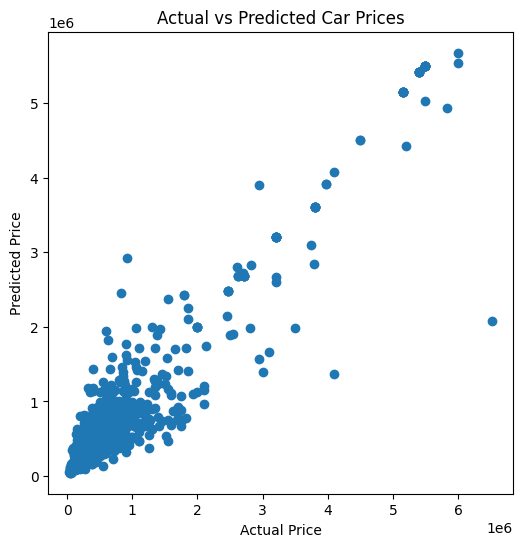

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


🔹  Feature Importance

In [64]:
importances = model.feature_importances_
features_names = X.columns

fi = pd.DataFrame({
    'Feature': features_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi


,Feature,Importance
8,transmission_Manual,0.347090
1,km_driven,0.222075
0,year,0.203425
6,seller_type_Individual,0.062121
3,fuel_Diesel,0.053616
5,fuel_Petrol,0.048594
2,seats,0.042640
11,owner_Test Drive Car,0.007252
7,seller_type_Trustmark Dealer,0.006557
10,owner_Second Owner,0.005567


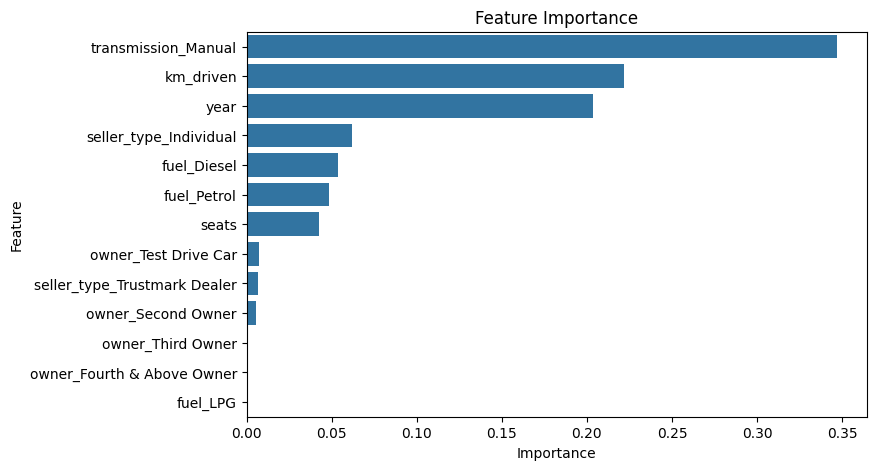

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi)
plt.title("Feature Importance")
plt.show()


In [66]:
pickle.dump(model, open("car_price_model.pkl", "wb"))
pickle.dump(X.columns, open("columns.pkl", "wb"))
